In [1]:
# dsvm_phase2_arl_evaluation.ipynb
# Phase II: 고정된 h*에 대한 ARL0/ARL1 평가

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

In [2]:
# 프로젝트 루트 및 결과 디렉토리 설정
THIS_NOTEBOOK = Path().resolve()
PROJECT_ROOT = THIS_NOTEBOOK.parent   # dsvm-dtw/ 안에 있다고 가정

RESULTS_DIR = PROJECT_ROOT / "results"
TABLES_DIR = RESULTS_DIR / "tables"
CONTROL_DIR = RESULTS_DIR / "control_limits"

TABLES_DIR.mkdir(parents=True, exist_ok=True)
CONTROL_DIR.mkdir(parents=True, exist_ok=True)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("RESULTS_DIR :", RESULTS_DIR)
print("TABLES_DIR  :", TABLES_DIR)
print("CONTROL_DIR :", CONTROL_DIR)


PROJECT_ROOT: C:\Users\siam2\Desktop\dsvm-dtw
RESULTS_DIR : C:\Users\siam2\Desktop\dsvm-dtw\results
TABLES_DIR  : C:\Users\siam2\Desktop\dsvm-dtw\results\tables
CONTROL_DIR : C:\Users\siam2\Desktop\dsvm-dtw\results\control_limits


In [3]:
# 공통 실험 설정
dataset = "ECG5000"
mode = "dtw"          # "ecd" 또는 "dtw"
data_version = "original"
seed = 9

# run_dsvm에서 사용했던 m과 동일해야 함
m = 100

print("dataset      :", dataset)
print("mode         :", mode)
print("data_version :", data_version)
print("seed         :", seed)
print("m            :", m)


dataset      : ECG5000
mode         : dtw
data_version : original
seed         : 9
m            : 100


In [4]:
# Phase I에서 설계한 h* 불러오기

h_star_npy_name = (
    f"{dataset}_train_incontrol_h_star_{mode}_{data_version}"
    f"_bootstrap_seed{seed}_m={m}.npy"
)
h_star_path = CONTROL_DIR / h_star_npy_name

print("h* npy 경로:", h_star_path)

# np.save 했을 때 1D array로 저장했으니 [0]만 꺼내면 됨
h_star_arr = np.load(h_star_path)
h_star = float(h_star_arr[0])

print(f"\n불러온 h* = {h_star:.6f}")


h* npy 경로: C:\Users\siam2\Desktop\dsvm-dtw\results\control_limits\ECG5000_train_incontrol_h_star_dtw_original_bootstrap_seed9_m=100.npy

불러온 h* = 0.343844


In [5]:
# Phase II용 p_swk 파일의 rep 범위 (비-bootstrap 결과)
rep_start = 0
rep_end = 999   # 예: 0~1999면 rep_0 ~ rep_1999

file_name_ic = (
    f"{dataset}_test_incontrol_p_swk_matrix_{mode}_{data_version}"
    f"({rep_start}~{rep_end})_bootstrap_seed{seed}_m={m}.csv"
)
file_name_oc = (
    f"{dataset}_test_outcontrol_p_swk_matrix_{mode}_{data_version}"
    f"({rep_start}~{rep_end})_bootstrap_seed{seed}_m={m}.csv"
)

path_ic = TABLES_DIR / file_name_ic
path_oc = TABLES_DIR / file_name_oc

print("test_incontrol p_swk 파일:", path_ic)
print("test_outcontrol p_swk 파일:", path_oc)

# 't'를 index로 복구해서 읽기
df_ic = pd.read_csv(path_ic, index_col=0)
df_oc = pd.read_csv(path_oc, index_col=0)

print("df_ic.shape:", df_ic.shape)
print("df_oc.shape:", df_oc.shape)

# m consistency 체크
assert df_ic.shape[0] == m, f"test_incontrol 행 길이 {df_ic.shape[0]} != m {m}"
assert df_oc.shape[0] == m, f"test_outcontrol 행 길이 {df_oc.shape[0]} != m {m}"

df_ic.head()


test_incontrol p_swk 파일: C:\Users\siam2\Desktop\dsvm-dtw\results\tables\ECG5000_test_incontrol_p_swk_matrix_dtw_original(0~999)_bootstrap_seed9_m=100.csv
test_outcontrol p_swk 파일: C:\Users\siam2\Desktop\dsvm-dtw\results\tables\ECG5000_test_outcontrol_p_swk_matrix_dtw_original(0~999)_bootstrap_seed9_m=100.csv
df_ic.shape: (100, 1000)
df_oc.shape: (100, 1000)


,rep_0,rep_1,rep_2,rep_3,rep_4,rep_5,rep_6,rep_7,rep_8,rep_9,...,rep_990,rep_991,rep_992,rep_993,rep_994,rep_995,rep_996,rep_997,rep_998,rep_999
t,,,,,,,,,,,,,,,,,,,,,
0,0.361932,0.347778,0.326664,0.329696,0.329806,0.333745,0.324430,0.329805,0.335282,0.323467,...,0.338623,0.318121,0.333478,0.345110,0.327226,0.322099,0.325347,0.344044,0.332004,0.316979
1,0.313861,0.328293,0.328000,0.336092,0.338632,0.345265,0.323766,0.320826,0.332171,0.352157,...,0.324675,0.318972,0.335740,0.339663,0.331789,0.302032,0.348539,0.334330,0.327544,0.325964
2,0.343101,0.332619,0.346787,0.329078,0.322388,0.320196,0.297586,0.334063,0.321847,0.324723,...,0.311553,0.320774,0.327289,0.300993,0.317629,0.326538,0.366015,0.336016,0.329736,0.336758
3,0.334460,0.333640,0.335273,0.323346,0.341708,0.328543,0.324381,0.331620,0.325549,0.326497,...,0.314266,0.337915,0.339045,0.317438,0.327903,0.315543,0.334292,0.319126,0.321158,0.319036
4,0.332184,0.341936,0.331257,0.341082,0.332452,0.342580,0.331482,0.334002,0.339762,0.328723,...,0.325035,0.325405,0.330650,0.326040,0.326743,0.315855,0.311177,0.331104,0.300153,0.334128


In [6]:
import sys
SRC_DIR = PROJECT_ROOT / "src"
if str(SRC_DIR) not in sys.path:
    sys.path.insert(0, str(SRC_DIR))

from dsvm.arl_mcc import estimate_arl_for_h_mcc


In [7]:
# numpy array로 변환
p_swk_ic = df_ic.values   # test_incontrol
p_swk_oc = df_oc.values   # test_outcontrol

print("p_swk_ic shape:", p_swk_ic.shape)
print("p_swk_oc shape:", p_swk_oc.shape)

# ARL0(h*) 추정 (test_incontrol)
res_ic = estimate_arl_for_h_mcc(h=h_star, p_swk_mat=p_swk_ic, m=m)

# ARL1(h*) 추정 (test_outcontrol)
res_oc = estimate_arl_for_h_mcc(h=h_star, p_swk_mat=p_swk_oc, m=m)

res_ic, res_oc


p_swk_ic shape: (100, 1000)
p_swk_oc shape: (100, 1000)


({'arl': 19.980228928199793,
  'sdrl': 29.294983464419964,
  'se': 0.9263887176453733,
  'N': 1000,
  'N0': 961,
  'N_plus': 39},
 {'arl': 2.84,
  'sdrl': 1.0744300814850638,
  'se': 0.03397646244093109,
  'N': 1000,
  'N0': 1000,
  'N_plus': 0})

In [8]:
summary = pd.DataFrame([
    {
        "type": "ARL0 (test_incontrol)",
        "ARL":  res_ic["arl"],
        "SDRL": res_ic["sdrl"],
        "SE":   res_ic["se"],
        "N":    res_ic["N"],
        "N0":   res_ic["N0"],
        "N+":   res_ic["N_plus"],
    },
    {
        "type": "ARL1 (test_outcontrol)",
        "ARL":  res_oc["arl"],
        "SDRL": res_oc["sdrl"],
        "SE":   res_oc["se"],
        "N":    res_oc["N"],
        "N0":   res_oc["N0"],
        "N+":   res_oc["N_plus"],
    },
])

summary


,type,ARL,SDRL,SE,N,N0,N+
0,ARL0 (test_incontrol),19.980229,29.294983,0.926389,1000,961,39
1,ARL1 (test_outcontrol),2.840000,1.074430,0.033976,1000,1000,0


In [9]:
print("===== Phase II ARL 평가 (h* 기준) =====\n")

print(f"[ARL0] test_incontrol 기준")
print(f"  ARL0(h*) ≈ {res_ic['arl']:.3f}")
print(f"  SDRL0    ≈ {res_ic['sdrl']:.3f}")
print(f"  SE0      ≈ {res_ic['se']:.4f}")
print(f"  N0 (uncensored)  = {res_ic['N0']}")
print(f"  N+ (censored)    = {res_ic['N_plus']}\n")

print(f"[ARL1] test_outcontrol 기준")
print(f"  ARL1(h*) ≈ {res_oc['arl']:.3f}")
print(f"  SDRL1    ≈ {res_oc['sdrl']:.3f}")
print(f"  SE1      ≈ {res_oc['se']:.4f}")
print(f"  N0 (uncensored)  = {res_oc['N0']}")
print(f"  N+ (censored)    = {res_oc['N_plus']}")


===== Phase II ARL 평가 (h* 기준) =====

[ARL0] test_incontrol 기준
  ARL0(h*) ≈ 19.980
  SDRL0    ≈ 29.295
  SE0      ≈ 0.9264
  N0 (uncensored)  = 961
  N+ (censored)    = 39

[ARL1] test_outcontrol 기준
  ARL1(h*) ≈ 2.840
  SDRL1    ≈ 1.074
  SE1      ≈ 0.0340
  N0 (uncensored)  = 1000
  N+ (censored)    = 0


c:\Users\siam2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\siam2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


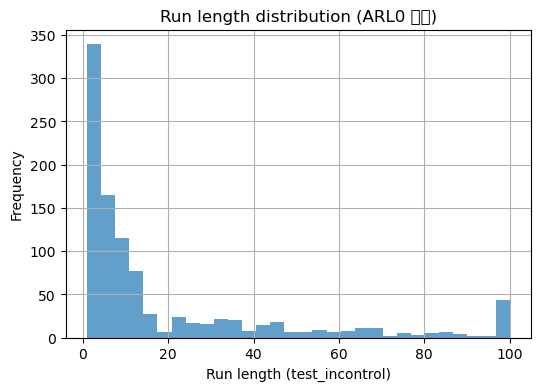

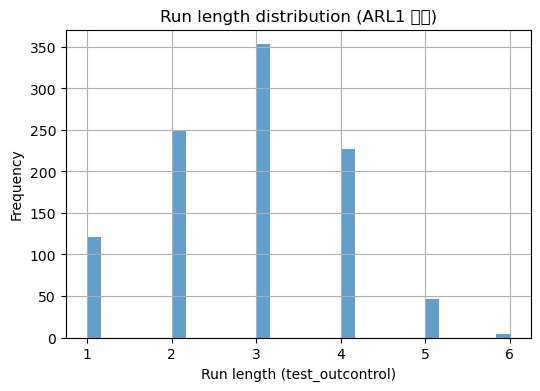

In [10]:
def extract_runlengths(h, p_swk_mat, m):
    outer_reps = p_swk_mat.shape[1]
    rls = []
    for r in range(outer_reps):
        exceed_idx = np.where(p_swk_mat[:, r] > h)[0]
        if len(exceed_idx) > 0:
            rl = exceed_idx[0] + 1
        else:
            rl = m
        rls.append(rl)
    return np.array(rls, dtype=int)

rl_ic = extract_runlengths(h_star, p_swk_ic, m)
rl_oc = extract_runlengths(h_star, p_swk_oc, m)

plt.hist(rl_ic, bins=30, alpha=0.7)
plt.xlabel("Run length (test_incontrol)")
plt.ylabel("Frequency")
plt.title("Run length distribution (ARL0 측면)")
plt.show()

plt.hist(rl_oc, bins=30, alpha=0.7)
plt.xlabel("Run length (test_outcontrol)")
plt.ylabel("Frequency")
plt.title("Run length distribution (ARL1 측면)")
plt.show()


In [11]:
import json

# Phase I에서 저장한 h* json 파일명 구성
h_star_json_name = (
    f"{dataset}_train_incontrol_h_star_{mode}_{data_version}"
    f"_bootstrap_seed{seed}_m={m}.json"
)

h_star_json_path = CONTROL_DIR / h_star_json_name

print("불러올 Phase I h_meta 경로:", h_star_json_path)

# JSON 로드
with open(h_star_json_path, "r", encoding="utf-8") as f:
    h_meta = json.load(f)

# 확인
h_meta

불러올 Phase I h_meta 경로: C:\Users\siam2\Desktop\dsvm-dtw\results\control_limits\ECG5000_train_incontrol_h_star_dtw_original_bootstrap_seed9_m=100.json


{'dataset': 'ECG5000',
 'stream': 'train_incontrol',
 'mode': 'dtw',
 'data_version': 'original',
 'seed': 9,
 'm': 100,
 'target_ARL0': 20,
 'h_star': 0.34384422245189583,
 'ARL0_h_star': 19.980228928199793,
 'SDRL_h_star': 29.294983464419964,
 'SE_ARL0_h_star': 0.9263887176453733,
 'rep_start': 0,
 'rep_end': 999}

In [12]:
import json

# 1) Phase I(train_incontrol)에서의 ARL0(h*) 정보 가져오기
#    - h_meta는 Phase I에서 저장한 json을 읽어온 dict라고 가정
arl_train = float(h_meta.get("ARL0_h_star"))
sdrl_train = float(h_meta.get("SDRL_h_star"))
se_train = float(h_meta.get("SE_ARL0_h_star"))

# 2) Phase II에서 계산한 ARL0/ARL1 정보 (test_incontrol / test_outcontrol)
arl_ic   = float(res_ic["arl"])
sdrl_ic  = float(res_ic["sdrl"])
se_ic    = float(res_ic["se"])

arl_oc   = float(res_oc["arl"])
sdrl_oc  = float(res_oc["sdrl"])
se_oc    = float(res_oc["se"])

# 3) 요약 결과 dict 구성
summary = {
    "dataset": dataset,
    "mode": mode,
    "data_version": data_version,
    "seed": int(seed),
    "m": int(m),
    "control_limit_h_star": float(h_star),

    # Phase I에서 target ARL0와 실제 달성 ARL0 기록
    "phase1": {
        "stream": "train_incontrol",
        "target_ARL0": float(h_meta.get("target_ARL0", 20.0)),
        "ARL0_h_star": arl_train,
        "SDRL0_h_star": sdrl_train,
        "SE_ARL0_h_star": se_train,
    },

    # Phase II: test_incontrol / test_outcontrol 결과
    "phase2": {
        "test_incontrol": {
            "ARL": arl_ic,
            "SDRL": sdrl_ic,
            "SE": se_ic,
            "N": int(res_ic["N"]),
            "N0": int(res_ic["N0"]),
            "N_plus": int(res_ic["N_plus"]),
        },
        "test_outcontrol": {
            "ARL": arl_oc,
            "SDRL": sdrl_oc,
            "SE": se_oc,
            "N": int(res_oc["N"]),
            "N0": int(res_oc["N0"]),
            "N_plus": int(res_oc["N_plus"]),
        },
    },
}

# 4) 저장 디렉토리 설정 (ARL 요약 전용 폴더 하나 더 만듦)
ARL_DIR = RESULTS_DIR / "arl_summary"
ARL_DIR.mkdir(parents=True, exist_ok=True)

# 파일 이름: 데이터셋/모드/버전/seed/m까지 반영
json_name = (
    f"{dataset}_arl_summary_{mode}_{data_version}"
    f"_seed{seed}_m={m}.json"
)
json_path = ARL_DIR / json_name

with open(json_path, "w", encoding="utf-8") as f:
    json.dump(summary, f, ensure_ascii=False, indent=2)

print("ARL summary json 저장 완료:", json_path)


ARL summary json 저장 완료: C:\Users\siam2\Desktop\dsvm-dtw\results\arl_summary\ECG5000_arl_summary_dtw_original_seed9_m=100.json
